In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [3]:
model = torch.load('data_storage/CNN_L16.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[-1.2495, -0.3905, -0.5101],
                        [-0.6280, -0.6487, -0.1049],
                        [-1.2306, -0.7497, -0.6100]]],
              
              
                      [[[ 1.3761, -0.6013,  1.4072],
                        [-0.4110, -1.6699, -1.0132],
                        [ 1.5273, -0.9749,  0.3922]]],
              
              
                      [[[-0.2058, -0.4245, -0.6550],
                        [-0.5849,  0.0550, -1.2325],
                        [-0.7437, -1.2865, -0.8524]]],
              
              
                      [[[ 0.0274,  1.5444, -0.5203],
                        [-1.1095,  1.6781, -0.8695],
                        [-0.9338,  1.4510, -1.2502]]],
              
              
                      [[[-0.2475, -1.0346, -1.1592],
                        [-1.2870, -1.0431, -1.1226],
                        [-0.1341, -0.0316, -0.5913]]]])),
             ('fc.0.weight',
            

In [4]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[-1.2495, -0.3905, -0.5101],
          [-0.6280, -0.6487, -0.1049],
          [-1.2306, -0.7497, -0.6100]]],


        [[[ 1.3761, -0.6013,  1.4072],
          [-0.4110, -1.6699, -1.0132],
          [ 1.5273, -0.9749,  0.3922]]],


        [[[-0.2058, -0.4245, -0.6550],
          [-0.5849,  0.0550, -1.2325],
          [-0.7437, -1.2865, -0.8524]]],


        [[[ 0.0274,  1.5444, -0.5203],
          [-1.1095,  1.6781, -0.8695],
          [-0.9338,  1.4510, -1.2502]]],


        [[[-0.2475, -1.0346, -1.1592],
          [-1.2870, -1.0431, -1.1226],
          [-0.1341, -0.0316, -0.5913]]]])

In [5]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.numpy()

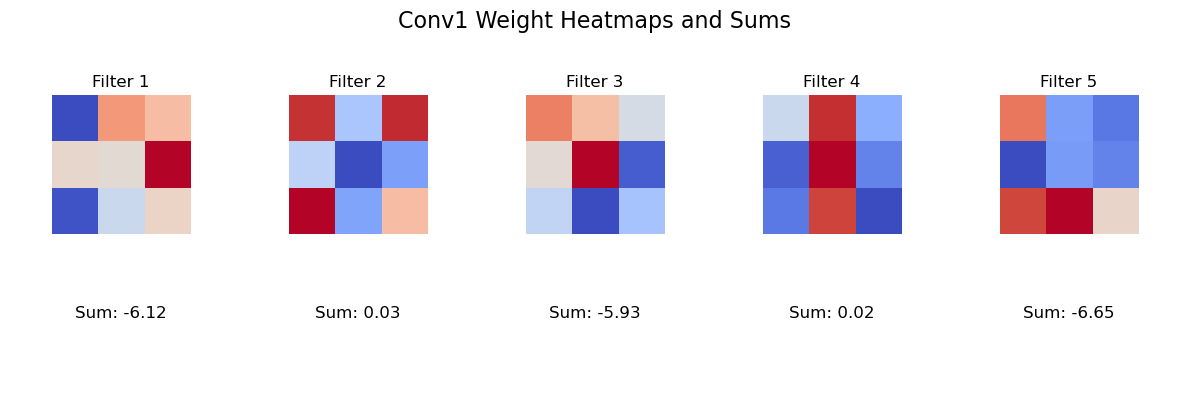

In [6]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# 5つの重みフィルターとその成分の和を1つの図にプロット
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(conv1_weight_np[i, 0], cmap='coolwarm', interpolation='nearest')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
    plt.axis('off')

plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [7]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[-0.0220, -0.0185, -0.0205,  ..., -0.0150, -0.0182, -0.0184],
        [ 0.0669, -0.0936, -0.1458,  ...,  0.1643, -0.0963,  0.2178],
        [-0.2063, -0.0145,  0.1138,  ...,  0.0100,  0.1296, -0.0944],
        ...,
        [ 0.1010,  0.2097,  0.0196,  ..., -0.1728, -0.1332, -0.3355],
        [ 0.0654,  0.0876, -0.0928,  ...,  0.0036, -0.3298, -0.0688],
        [ 0.2793, -0.0464,  0.0211,  ...,  0.1196,  0.1507, -0.0788]])

In [8]:
fc_weight.size()

torch.Size([25, 80])

In [9]:
# NumPy配列に変換
fc_weight_np = fc_weight.numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [22]:
fc_weight_np_square

array([[-0.02201937,  0.06692275, -0.20631586, ...,  0.10098467,
         0.06541507,  0.27926522],
       [-0.01848015, -0.0935713 , -0.01446099, ...,  0.20973632,
         0.08760214, -0.04644939],
       [-0.02053211, -0.14575104,  0.11379839, ...,  0.01962488,
        -0.09275395,  0.02112401],
       ...,
       [-0.01496514,  0.16432863,  0.00998363, ..., -0.17278154,
         0.00363036,  0.11959409],
       [-0.01824887, -0.09631529,  0.1295549 , ..., -0.13318235,
        -0.32984498,  0.15073922],
       [-0.01844455,  0.21780509, -0.09440828, ..., -0.335465  ,
        -0.06876118, -0.07880279]], dtype=float32)

In [25]:
fc_weight_np_square.shape

(80, 25)

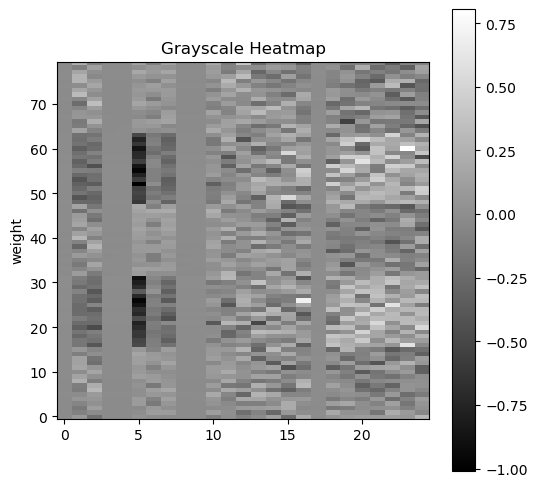

In [31]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', aspect=0.30, origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')


# x軸とy軸に名前を付ける
plt.ylabel('weight')

plt.show()

In [34]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([ -1.1695789 ,  -5.8027735 ,  -5.931694  ,  -1.1737431 ,
        -1.1697092 , -18.228977  ,  -2.6822052 ,  -4.0960965 ,
        -1.169415  ,  -1.1470805 ,   1.2590034 ,   0.71279806,
         1.3245183 ,   0.48995137,   0.6143471 ,   0.30438122,
         0.6215507 ,  -0.8241818 ,   1.2543875 ,   3.01544   ,
         1.9006095 ,   3.7495093 ,   2.8459034 ,   1.8462558 ,
         2.6609476 ], dtype=float32)

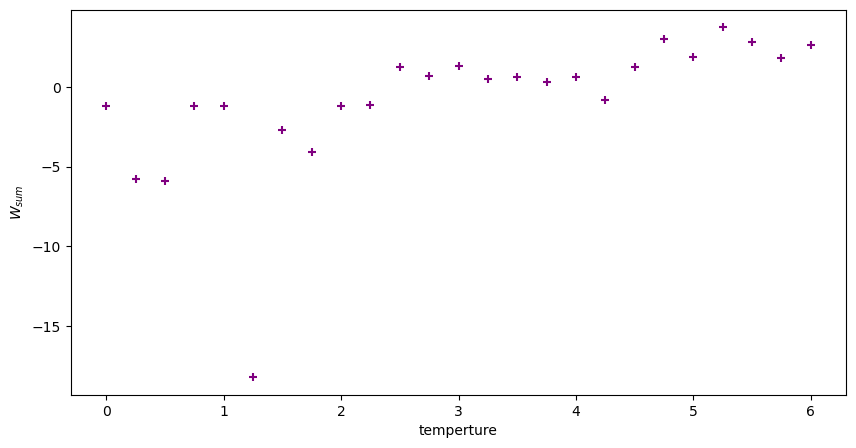

In [67]:
x = [x*0.25 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple')
plt.xlabel('temperture')
plt.ylabel('$W_{sum}$')

plt.show()

In [52]:
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

x_inverse

[0,
 4.0,
 2.0,
 1.3333333333333333,
 1.0,
 0.8,
 0.6666666666666666,
 0.5714285714285714,
 0.5,
 0.4444444444444444,
 0.4,
 0.36363636363636365,
 0.3333333333333333,
 0.3076923076923077,
 0.2857142857142857,
 0.26666666666666666,
 0.25,
 0.23529411764705882,
 0.2222222222222222,
 0.21052631578947367,
 0.2,
 0.19047619047619047,
 0.18181818181818182,
 0.17391304347826086,
 0.16666666666666666]

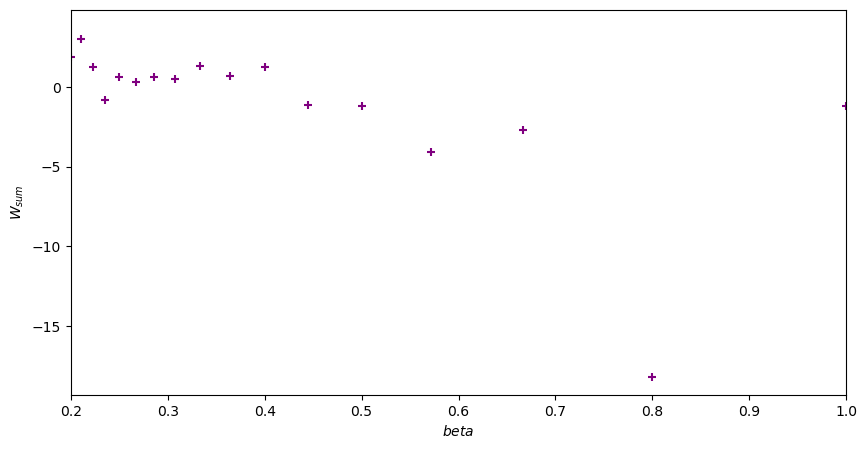

In [65]:
x = [x*0.25 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# x軸の値を逆数に変換
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x_inverse, y, marker='+', color='purple')
plt.xlabel('$beta$')
plt.ylabel('$W_{sum}$')

# x軸の範囲を指定
plt.xlim(0.2, 1) 

plt.show()